# Introduction

In this notebook, we will exlpore Movies dataset and ask some questions and try to answer them with the help of matplotlib visualizations and pandas operations.

We will try to answer the following questions:
1. [What is the movie with the highest Popularity rate? And what kind is it?](#What-is-the-movie-with-the-highest-Popularity-rate?-And-what-kind-is-it?)
2. [What year was the largest number of films produced?](#What-year-was-the-largest-number-of-films-produced?)
3. [What is most of the film genre?](#What-is-most-of-the-film-genre?)
4. [What kind of movies take the highest rating?](#What-kind-of-movies-take-the-highest-rating?)
5. [Which movie is more popular? Which movie is less popular?](#Which-movie-is-more-popular?-Which-movie-is-less-popular?)

- First, we will import necessary libraries and load the dataset.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('mymoviedb.csv', lineterminator='\n')
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


Let's take a look at the dataset.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [4]:
for col in df.columns:
    print(f"{col} : {df[col].nunique()}")

Release_Date : 5893
Title : 9513
Overview : 9822
Popularity : 8160
Vote_Count : 3266
Vote_Average : 74
Original_Language : 43
Genre : 2337
Poster_Url : 9827


In [5]:
df.duplicated().sum()

0

In [6]:
df[df.Title.duplicated(keep=False)].sort_values('Title')

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
3270,2015-05-22,365 Days,This film tracks a hasty marriage through its ...,28.341,12,4.8,te,Romance,https://image.tmdb.org/t/p/original/AoFyZGDgfr...
1424,2020-02-07,365 Days,"A woman falls victim to a dominant mafia boss,...",52.418,6540,7.0,pl,"Drama, Romance",https://image.tmdb.org/t/p/original/6KwrHucIE3...
5993,1984-10-09,A Christmas Carol,A bitter old miser who makes excuses for his u...,18.546,241,7.3,en,"Drama, Fantasy, TV Movie, Family",https://image.tmdb.org/t/p/original/kGmpIkjVRW...
2052,2009-11-04,A Christmas Carol,Miser Ebenezer Scrooge is awakened on Christma...,39.916,3732,6.9,en,"Animation, Family, Drama, Fantasy",https://image.tmdb.org/t/p/original/goHDZUnqZJ...
2169,2010-04-30,A Nightmare on Elm Street,The film that brings back horror icon Freddy K...,38.399,2187,5.5,en,"Horror, Mystery, Thriller",https://image.tmdb.org/t/p/original/4W2GvVM89X...
...,...,...,...,...,...,...,...,...,...
985,2003-05-30,Wrong Turn,Chris crashes into a carload of other young pe...,66.173,1978,6.3,en,"Horror, Thriller",https://image.tmdb.org/t/p/original/ixBGcbQKvl...
8978,2011-09-09,Wuthering Heights,"Yorkshire moorlands, northern England, in the ...",14.157,182,5.9,en,"Drama, Romance",https://image.tmdb.org/t/p/original/7gEcoCve3l...
7409,1939-04-07,Wuthering Heights,The Earnshaws are Yorkshire farmers during the...,16.080,189,7.3,en,"Drama, Romance",https://image.tmdb.org/t/p/original/tA3ZaItWqh...
1887,2020-07-24,"Yes, God, Yes","Alice, a young innocent Catholic girl, is temp...",42.470,353,6.4,en,"Comedy, Drama",https://image.tmdb.org/t/p/original/69SYznq2mS...


In [7]:
df[df.Overview.duplicated(keep=False)].sort_values('Overview')

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
1736,2015-04-25,Parasyte: Part 2,"Alien pods come to Earth and, naturally, start...",45.155,121,7.0,ja,"Science Fiction, Horror",https://image.tmdb.org/t/p/original/qO8zQ9dSAD...
1774,2014-11-29,Parasyte: Part 1,"Alien pods come to Earth and, naturally, start...",44.344,176,7.1,ja,"Science Fiction, Horror",https://image.tmdb.org/t/p/original/lNzCFguC8w...
2558,1993-09-23,Dragon Ball Z Side Story: Plan to Eradicate th...,Dr. Raichi is one of the only survivors of the...,34.174,29,6.3,ja,"Action, Adventure, Animation",https://image.tmdb.org/t/p/original/v8Fj0USMWp...
2567,2010-11-11,Dragon Ball: Plan to Eradicate the Super Saiyans,Dr. Raichi is one of the only survivors of the...,34.103,234,7.1,ja,"Action, Animation, Adventure",https://image.tmdb.org/t/p/original/vkZJ7MIa9X...
8016,1993-07-10,Crazy Hong Kong,"In the early 1990s, Nǃxau was cast in three lo...",15.223,13,4.8,cn,"Adventure, Comedy",https://image.tmdb.org/t/p/original/escomlWztO...
9518,1994-03-31,The Gods Must Be Funny in China,"In the early 1990s, Nǃxau was cast in three lo...",13.622,9,5.3,cn,Comedy,https://image.tmdb.org/t/p/original/wstrALDmRz...
3314,2011-07-16,Pokémon the Movie: Black - Victini and Reshiram,The Kingdom of the People of the Earth once ru...,28.070,117,6.6,ja,"Animation, Family, Adventure, Drama, Fantasy",https://image.tmdb.org/t/p/original/qPfo5ooRJW...
4171,2011-07-16,Pokémon the Movie: White - Victini and Zekrom,The Kingdom of the People of the Earth once ru...,23.748,132,6.6,ja,"Animation, Family, Adventure, Drama, Fantasy",https://image.tmdb.org/t/p/original/3g0GDIiFCT...
4421,2006-12-07,Charlotte's Web,Wilbur the pig is scared of the end of the sea...,22.901,1134,6.2,en,"Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/gqg3ruuEDQ...
9036,1973-03-01,Charlotte's Web,Wilbur the pig is scared of the end of the sea...,14.106,290,6.7,en,"Family, Music, Animation, Drama, Comedy",https://image.tmdb.org/t/p/original/eLq5bed09b...


In [8]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'])

Now we can see that the data is clean, but "Title" and "Overview" columns have duplicated values, so we know that there are simialar movie names and there are many parts of the same movie as there are the same overview about the movie.

Now let's move to visualizing the data and taking insights from it.

In [9]:
plt.style.use('fivethirtyeight')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Release_Date       9827 non-null   datetime64[ns]
 1   Title              9827 non-null   object        
 2   Overview           9827 non-null   object        
 3   Popularity         9827 non-null   float64       
 4   Vote_Count         9827 non-null   int64         
 5   Vote_Average       9827 non-null   float64       
 6   Original_Language  9827 non-null   object        
 7   Genre              9827 non-null   object        
 8   Poster_Url         9827 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 691.1+ KB


In [11]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


# What is the movie with the highest Popularity rate? And what kind is it? 

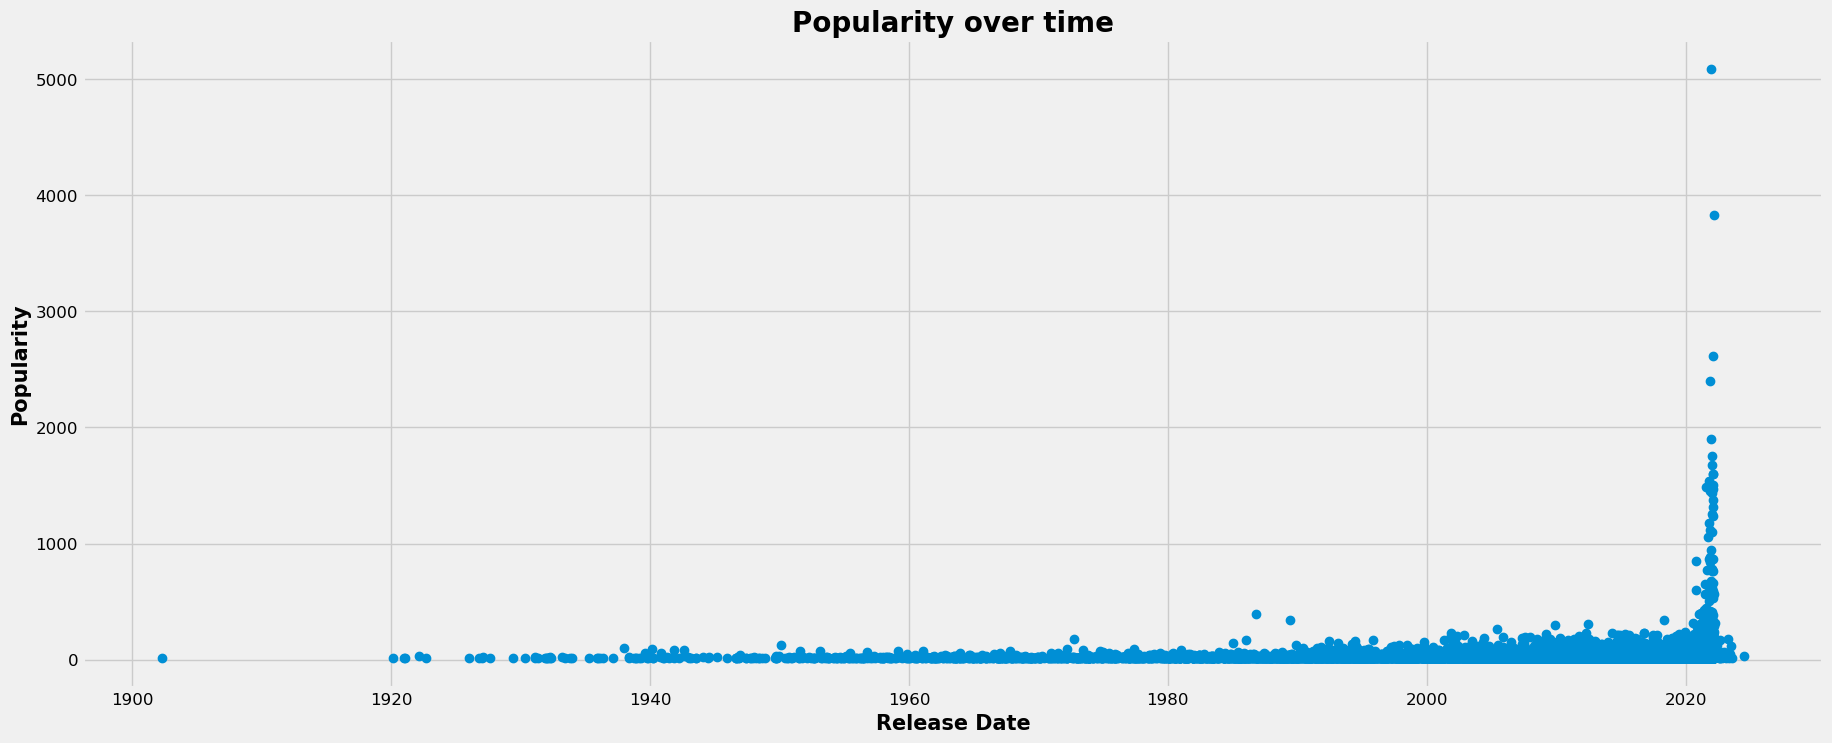

In [62]:
plt.figure(figsize=(20, 8))
plt.plot_date(df['Release_Date'], df['Popularity'])
plt.title('Popularity over time', fontsize=20, fontweight='bold')
plt.xlabel('Release Date', fontsize=15, fontweight='bold')
plt.ylabel('Popularity', fontsize=15, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [13]:
df[df.Popularity > 5000]

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...


So now we know that the highest popularity movie:
1. Was in 2021-12-15.
2. Its name is  "Spider-Man: No Way Home".
3. Hava a popularity of 5084.
4. It is an Action, Adventure, Science Fiction movie.

# What year was the largest number of films produced?

In [14]:
df["Year"] = df["Release_Date"].dt.year

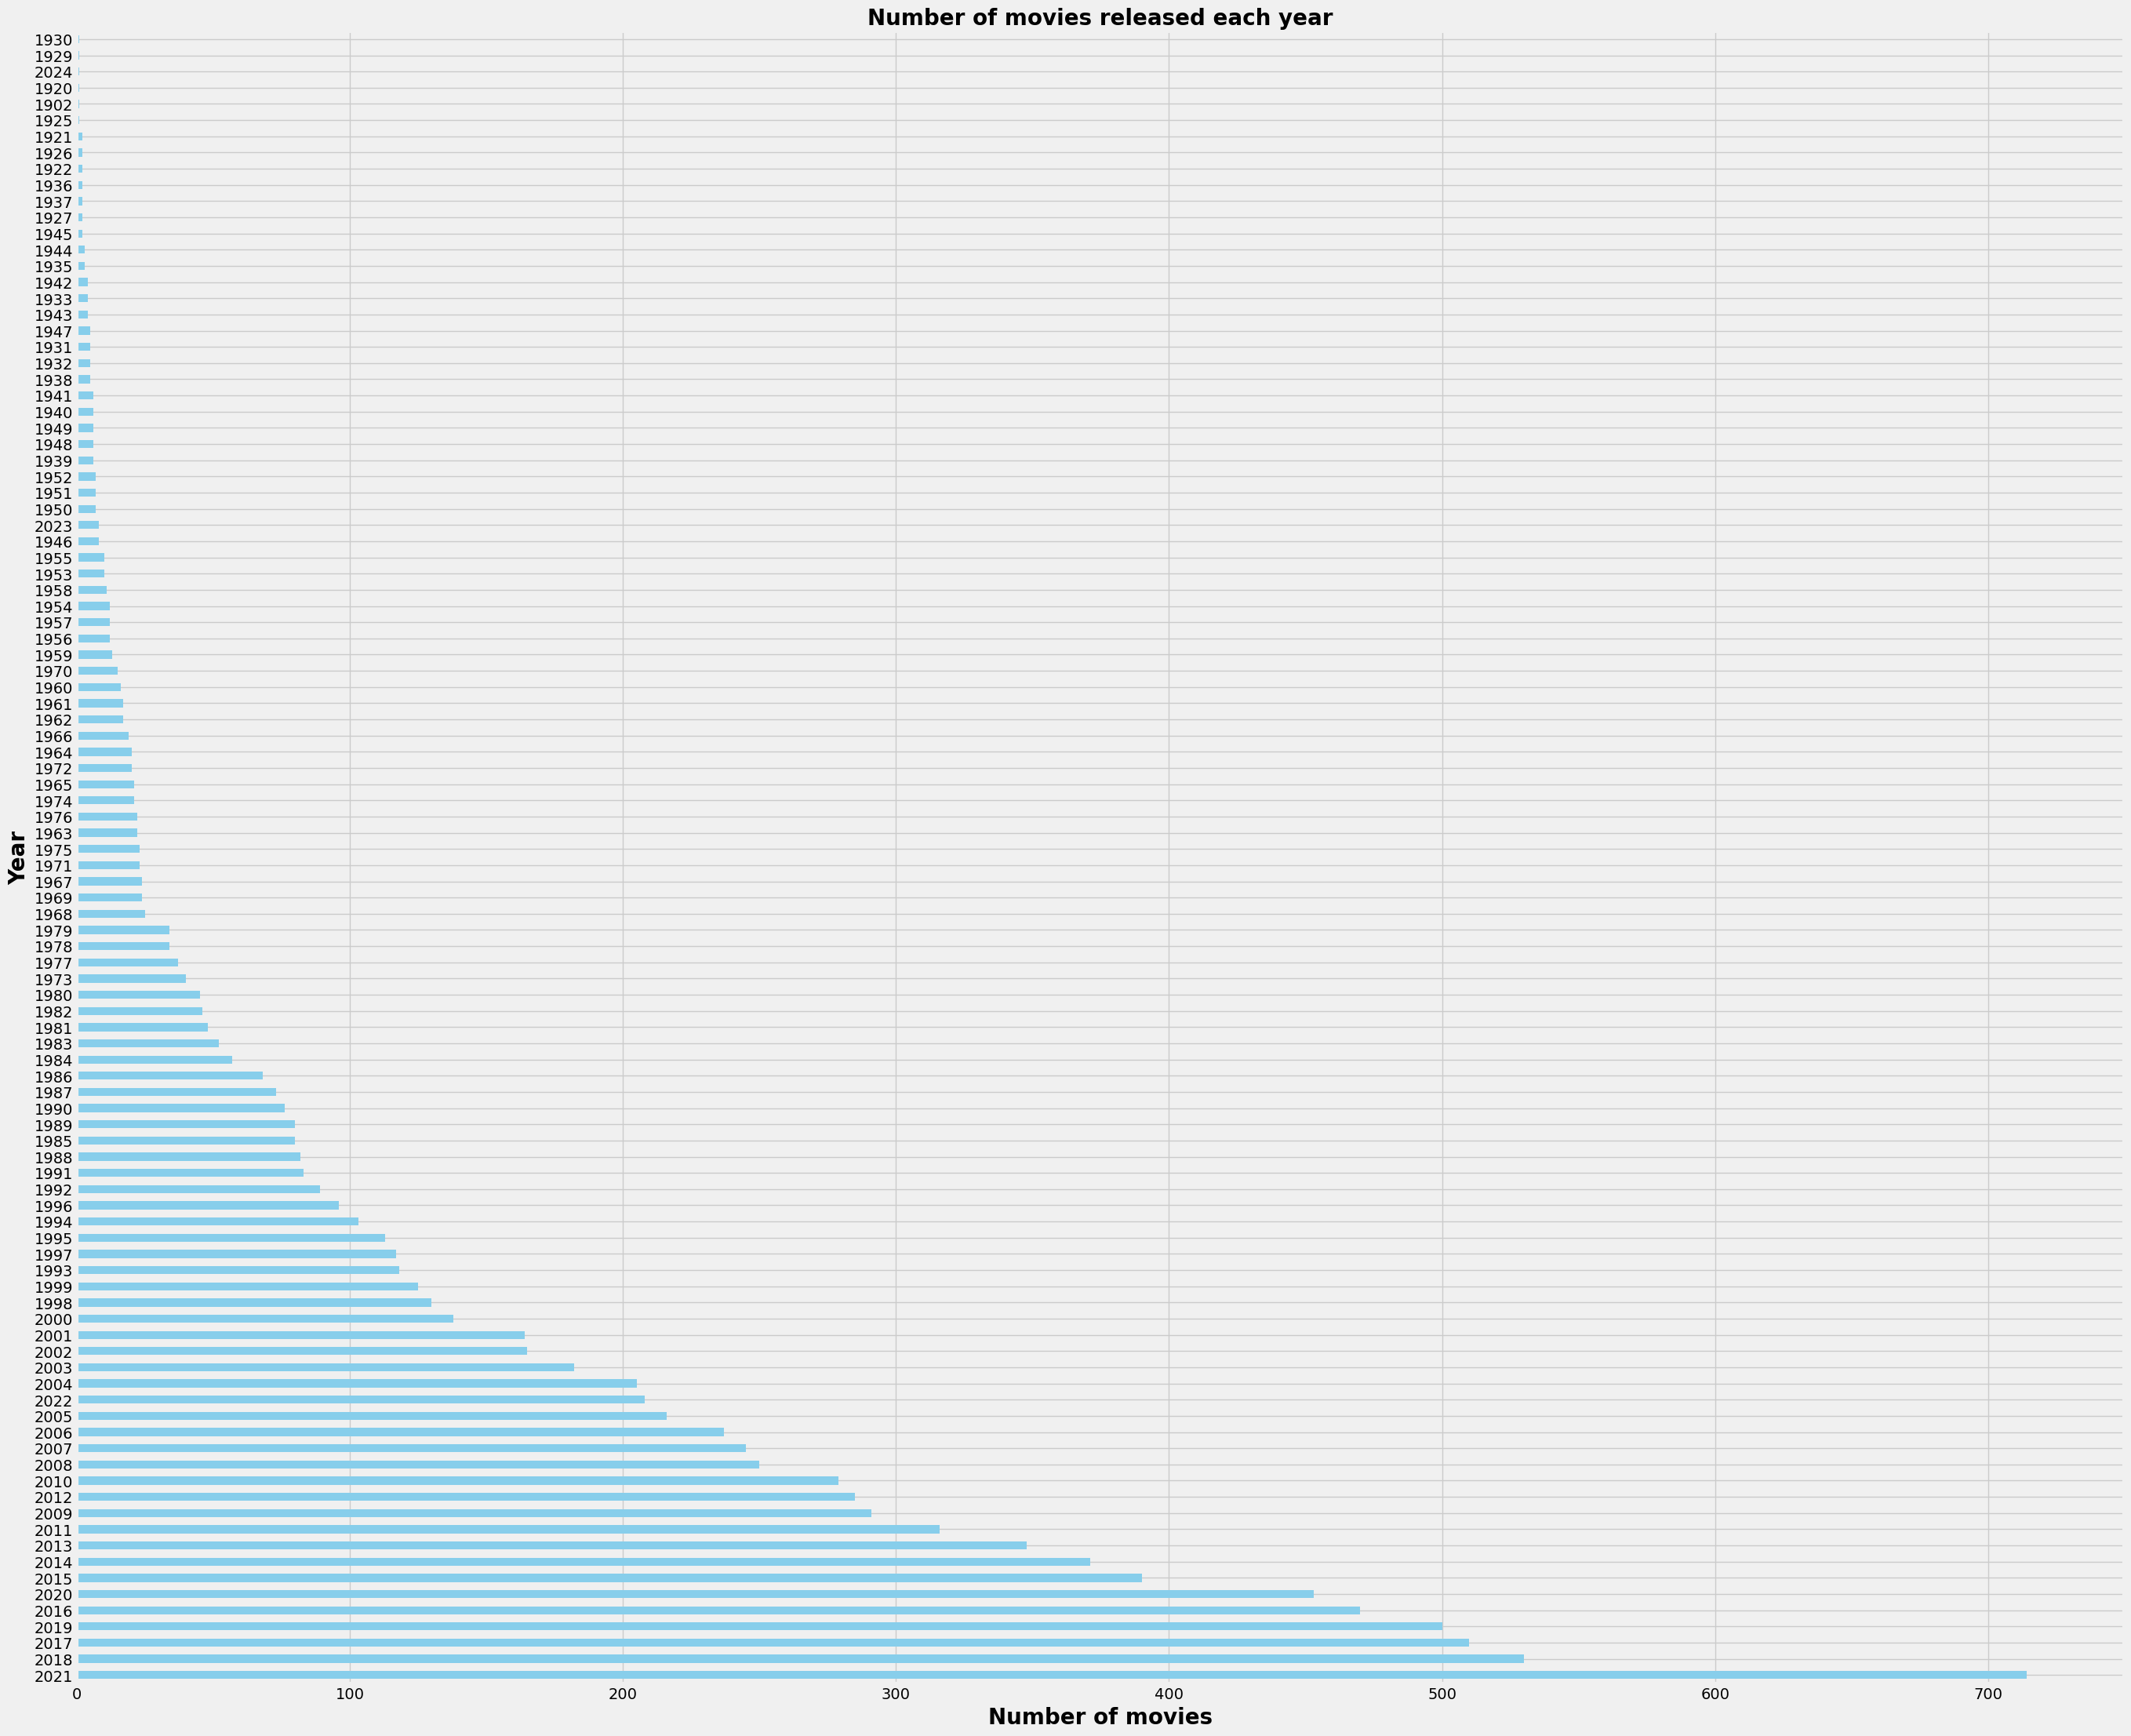

In [28]:
df['Year'].value_counts().plot(kind='barh', figsize=(30,26), color='skyblue')
plt.title('Number of movies released each year', fontsize=20, fontweight='bold')
plt.xlabel('Number of movies', fontsize=20, fontweight='bold')
plt.ylabel('Year', fontsize=20, fontweight='bold')
plt.show()

To make it more clear, let's take the years with movies higher than 100.

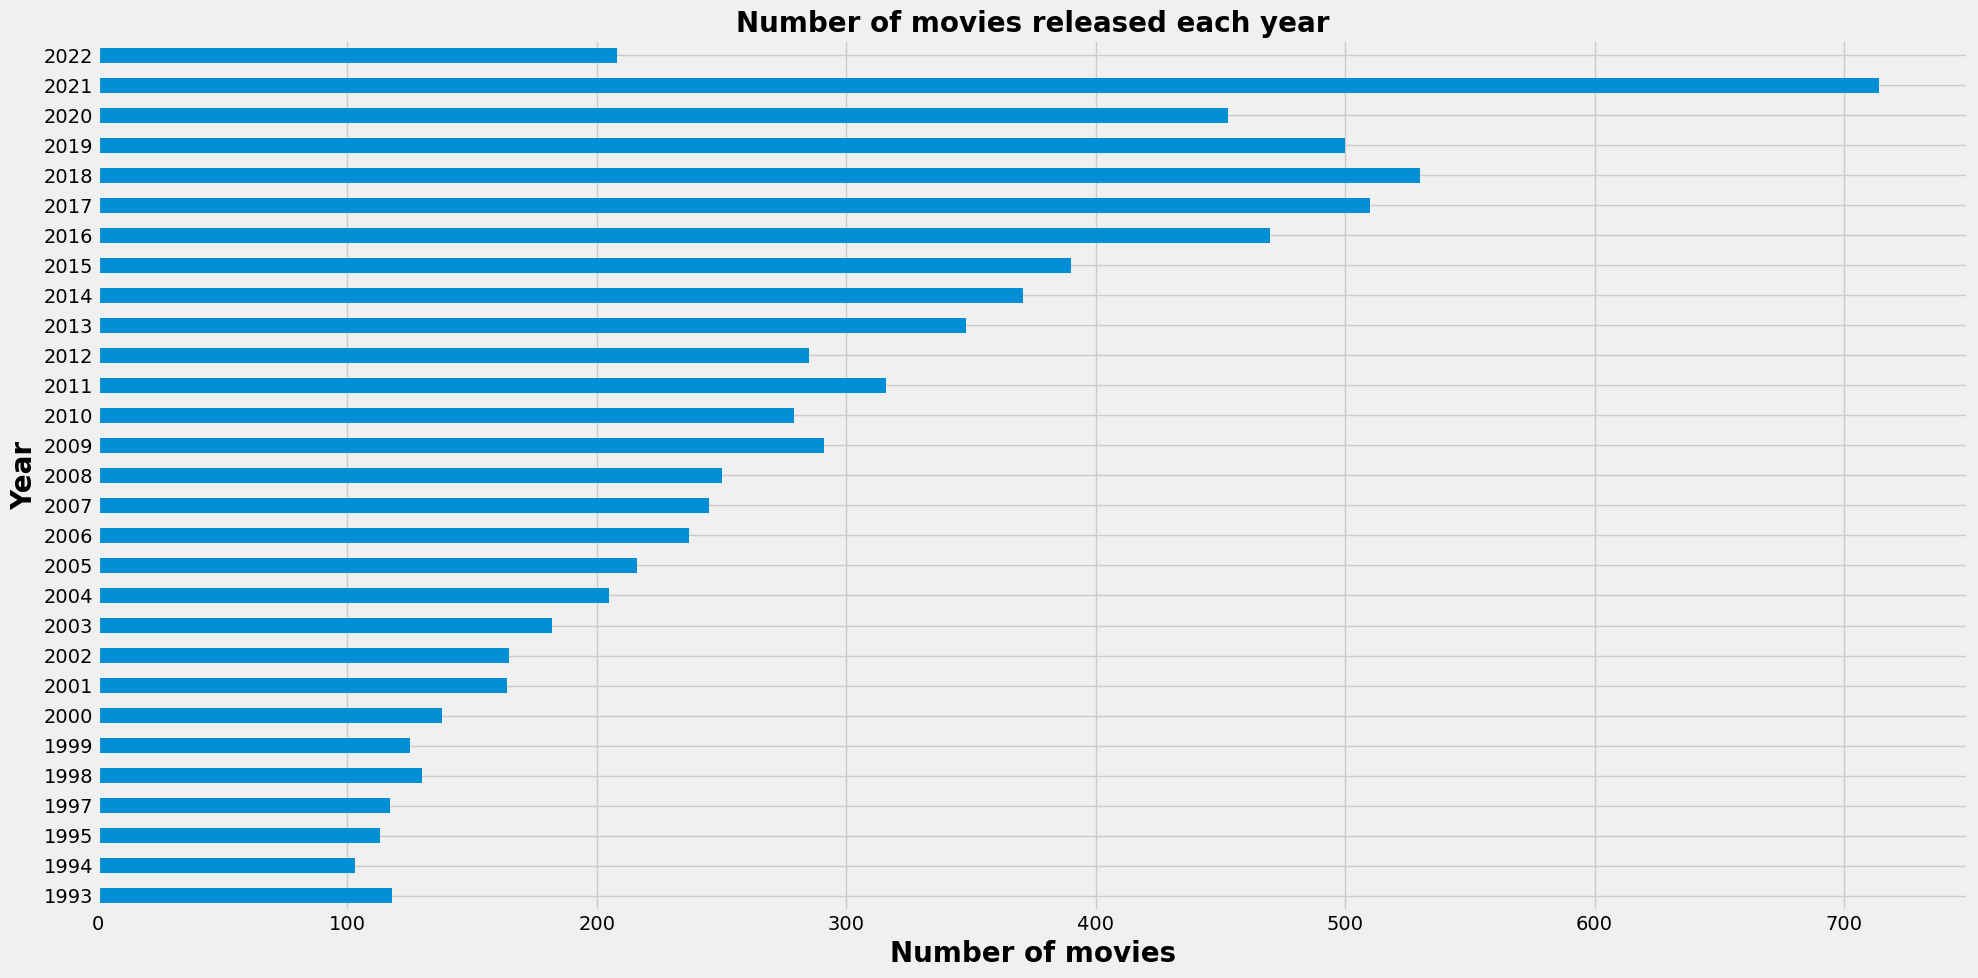

In [48]:
flag = df["Year"].value_counts().sort_index() > 100
flag = flag[flag].index
df[df["Year"].isin(flag)].value_counts("Year").sort_index().plot(kind="barh", figsize=(20, 10))
plt.title('Number of movies released each year', fontsize=20, fontweight='bold')
plt.xlabel('Number of movies', fontsize=20, fontweight='bold')
plt.ylabel('Year', fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()

Now we see that 2021 has the highest number of movies nearly 720 movies.

# What is the most popular genre in all movies?

In [64]:
df['Genre']

0       Action, Adventure, Science Fiction
1                 Crime, Mystery, Thriller
2                                 Thriller
3       Animation, Comedy, Family, Fantasy
4         Action, Adventure, Thriller, War
                       ...                
9822                          Drama, Crime
9823                                Horror
9824             Mystery, Thriller, Horror
9825                 Music, Drama, History
9826           War, Drama, Science Fiction
Name: Genre, Length: 9827, dtype: object

In [66]:
copy_ = df.copy()
copy_['Genre'] = copy_['Genre'].str.replace(' ', '').str.split(',')
plot_ = copy_.explode('Genre')['Genre'].value_counts()

In [76]:
plot_ / plot_.sum() * 100

Drama             14.515566
Comedy            11.751250
Action            10.413678
Thriller           9.646028
Adventure          7.184120
Romance            5.722483
Horror             5.699221
Animation          5.579033
Family             5.482108
Fantasy            5.071143
ScienceFiction     4.935448
Crime              4.815260
Mystery            2.996937
History            1.655488
War                1.194122
Music              1.143721
Documentary        0.833559
TVMovie            0.829682
Western            0.531152
Name: Genre, dtype: float64

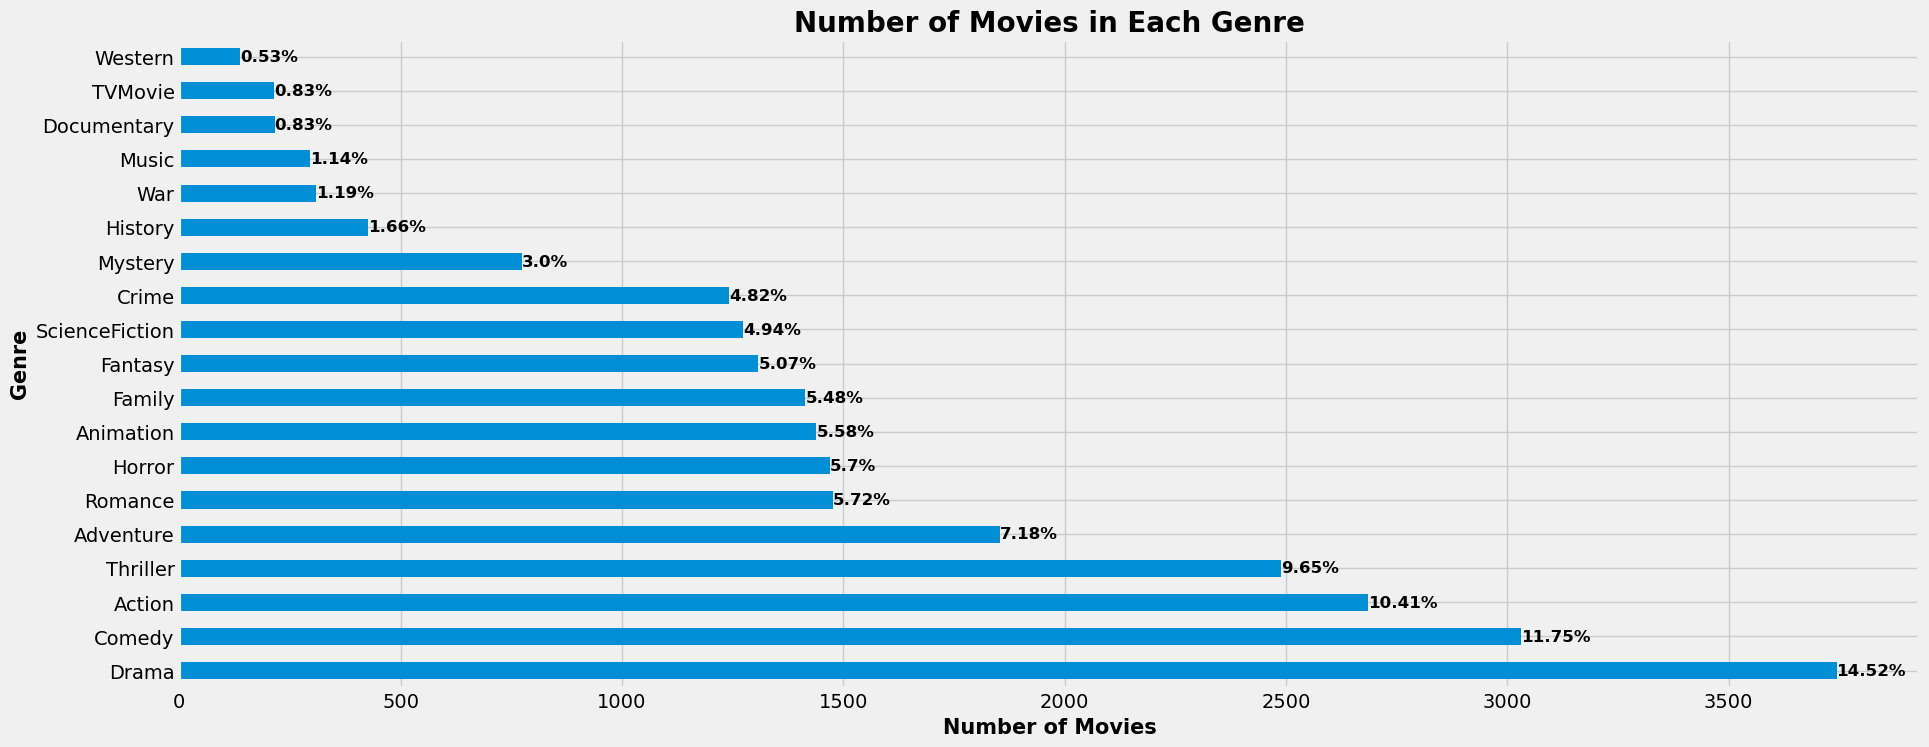

In [91]:
plot_.plot(kind='barh', figsize=(20, 8))
plt.xlabel('Number of Movies', fontsize=15, fontweight='bold')
plt.ylabel('Genre', fontsize=15, fontweight='bold')
plt.title('Number of Movies in Each Genre', fontsize=20, fontweight='bold')
for i, v in enumerate(plot_):
    plt.text(v, i, str(round(v/sum(plot_) * 100, 2)) + '%', va='center', fontsize=12, fontweight='bold')
plt.show()

So now we see that the most popular genre is "Drama" with 14.5% of all movies.

# What kind of movies take the highest rating?

In [86]:
to_plot = copy_.explode("Genre").groupby('Genre').Vote_Average.mean().sort_values()

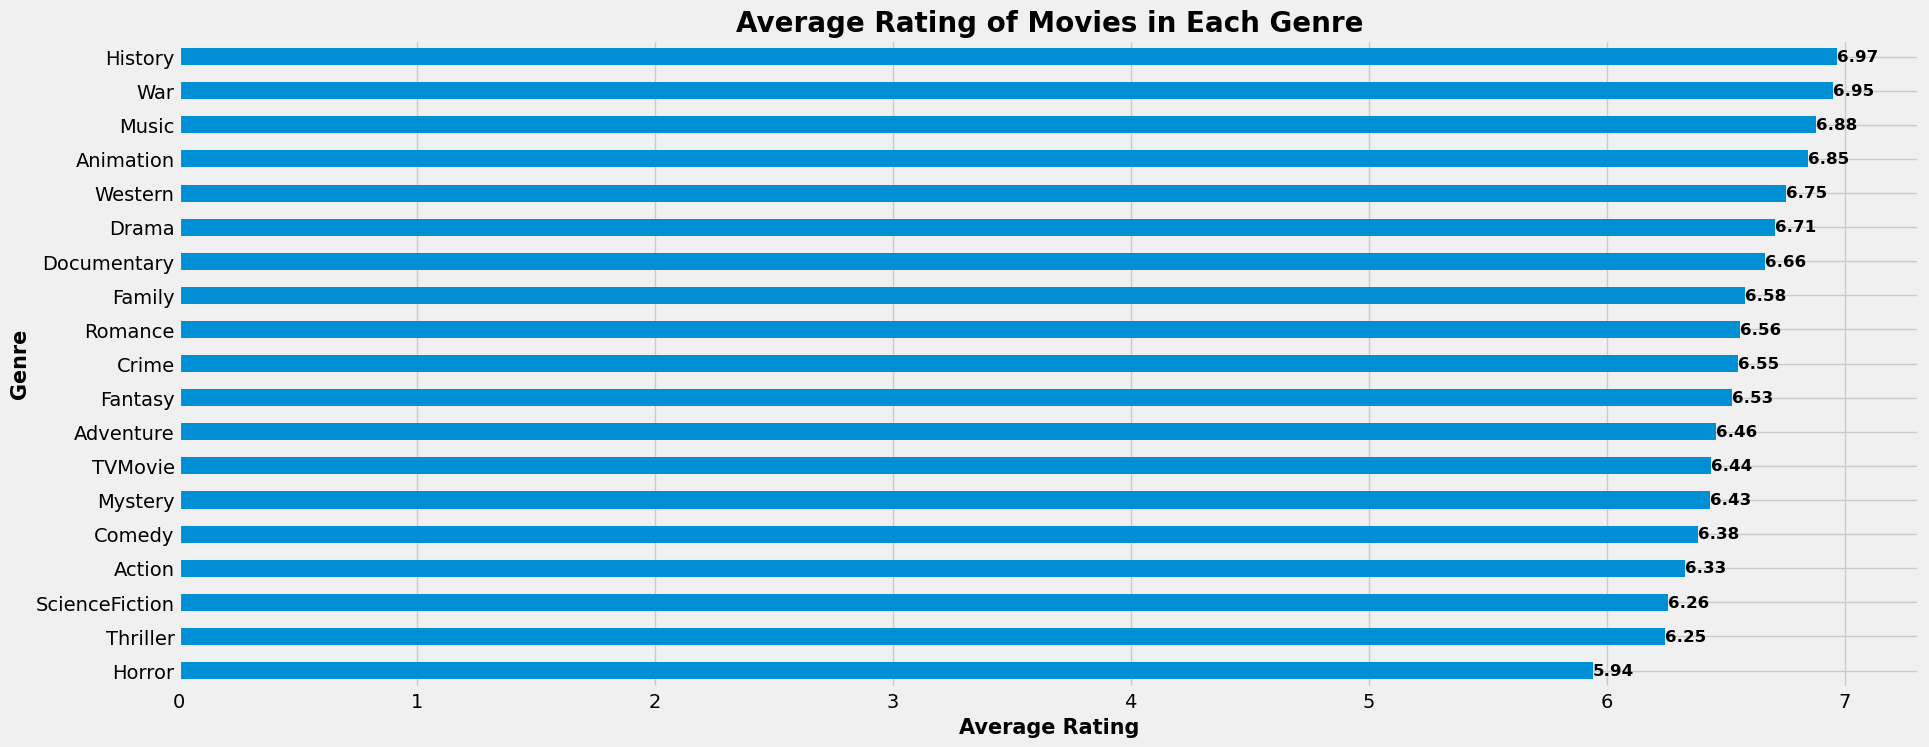

In [92]:
to_plot.plot(kind='barh', figsize=(20, 8))
plt.xlabel('Average Rating', fontsize=15, fontweight='bold')
plt.ylabel('Genre', fontsize=15, fontweight='bold')
plt.title('Average Rating of Movies in Each Genre', fontsize=20, fontweight='bold')
for i, v in enumerate(to_plot):
    plt.text(v, i, str(round(v, 2)), va='center', fontsize=12, fontweight='bold')
plt.show()

We can see that they are all so close to each other, but the highest rating is for "History" movies with 6.97 average rating.

# Which movie is more popular? Which movie is less popular?

In [137]:
most_popular = df.sort_values('Popularity', ascending=False).head(30)
least_popular = df.sort_values('Popularity', ascending=False).tail(30)

In [138]:
least_popular

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url,Year
9796,2013-09-17,In Secret,"In 1860s Paris, a young woman, Therese, is tra...",13.378,151,6.0,en,"Drama, Thriller, Crime",https://image.tmdb.org/t/p/original/zroAJKYqhw...,2013
9795,2017-09-29,Our Souls at Night,"Addie Moore and Louis Waters, a widow and wido...",13.378,357,6.6,en,"Romance, Drama",https://image.tmdb.org/t/p/original/49136pSuzc...,2017
9799,2014-10-08,"My Love, My Bride",Young Min and Mi Young are young couple who ge...,13.377,28,7.0,ko,"Comedy, Romance",https://image.tmdb.org/t/p/original/wXNfDjT5Iw...,2014
9800,2011-09-30,Take Shelter,"Plagued by a series of apocalyptic visions, a ...",13.377,1317,7.1,en,"Thriller, Drama, Horror",https://image.tmdb.org/t/p/original/zLZQv7cN8c...,2011
9801,1981-12-25,Reds,An account of the revolutionary years of the l...,13.377,234,7.0,en,"Drama, History, Romance",https://image.tmdb.org/t/p/original/3jOs4aWI7X...,1981
9802,1980-02-08,American Gigolo,Julian makes a lucrative living as an escort t...,13.377,451,6.1,en,"Crime, Drama, Romance, Thriller, Mystery",https://image.tmdb.org/t/p/original/igXGCwti23...,1980
9803,2004-09-29,Dead Man's Shoes,A soldier returns home to his small town and e...,13.376,401,7.2,en,"Drama, Thriller, Crime",https://image.tmdb.org/t/p/original/lI7dsNWL8U...,2004
9804,2015-10-03,Autumn Dreams,"With plans to leave their small town, teenage ...",13.375,95,6.8,en,"Comedy, TV Movie, Romance",https://image.tmdb.org/t/p/original/rqhBCMzRU6...,2015
9805,1960-08-12,Black Sunday,A vengeful witch and her fiendish servant retu...,13.375,353,7.5,it,Horror,https://image.tmdb.org/t/p/original/wpwETIDNFZ...,1960
9806,1966-10-19,The Fortune Cookie,A cameraman is knocked over during a football ...,13.375,233,7.3,en,"Romance, Comedy",https://image.tmdb.org/t/p/original/el09hjjwOw...,1966


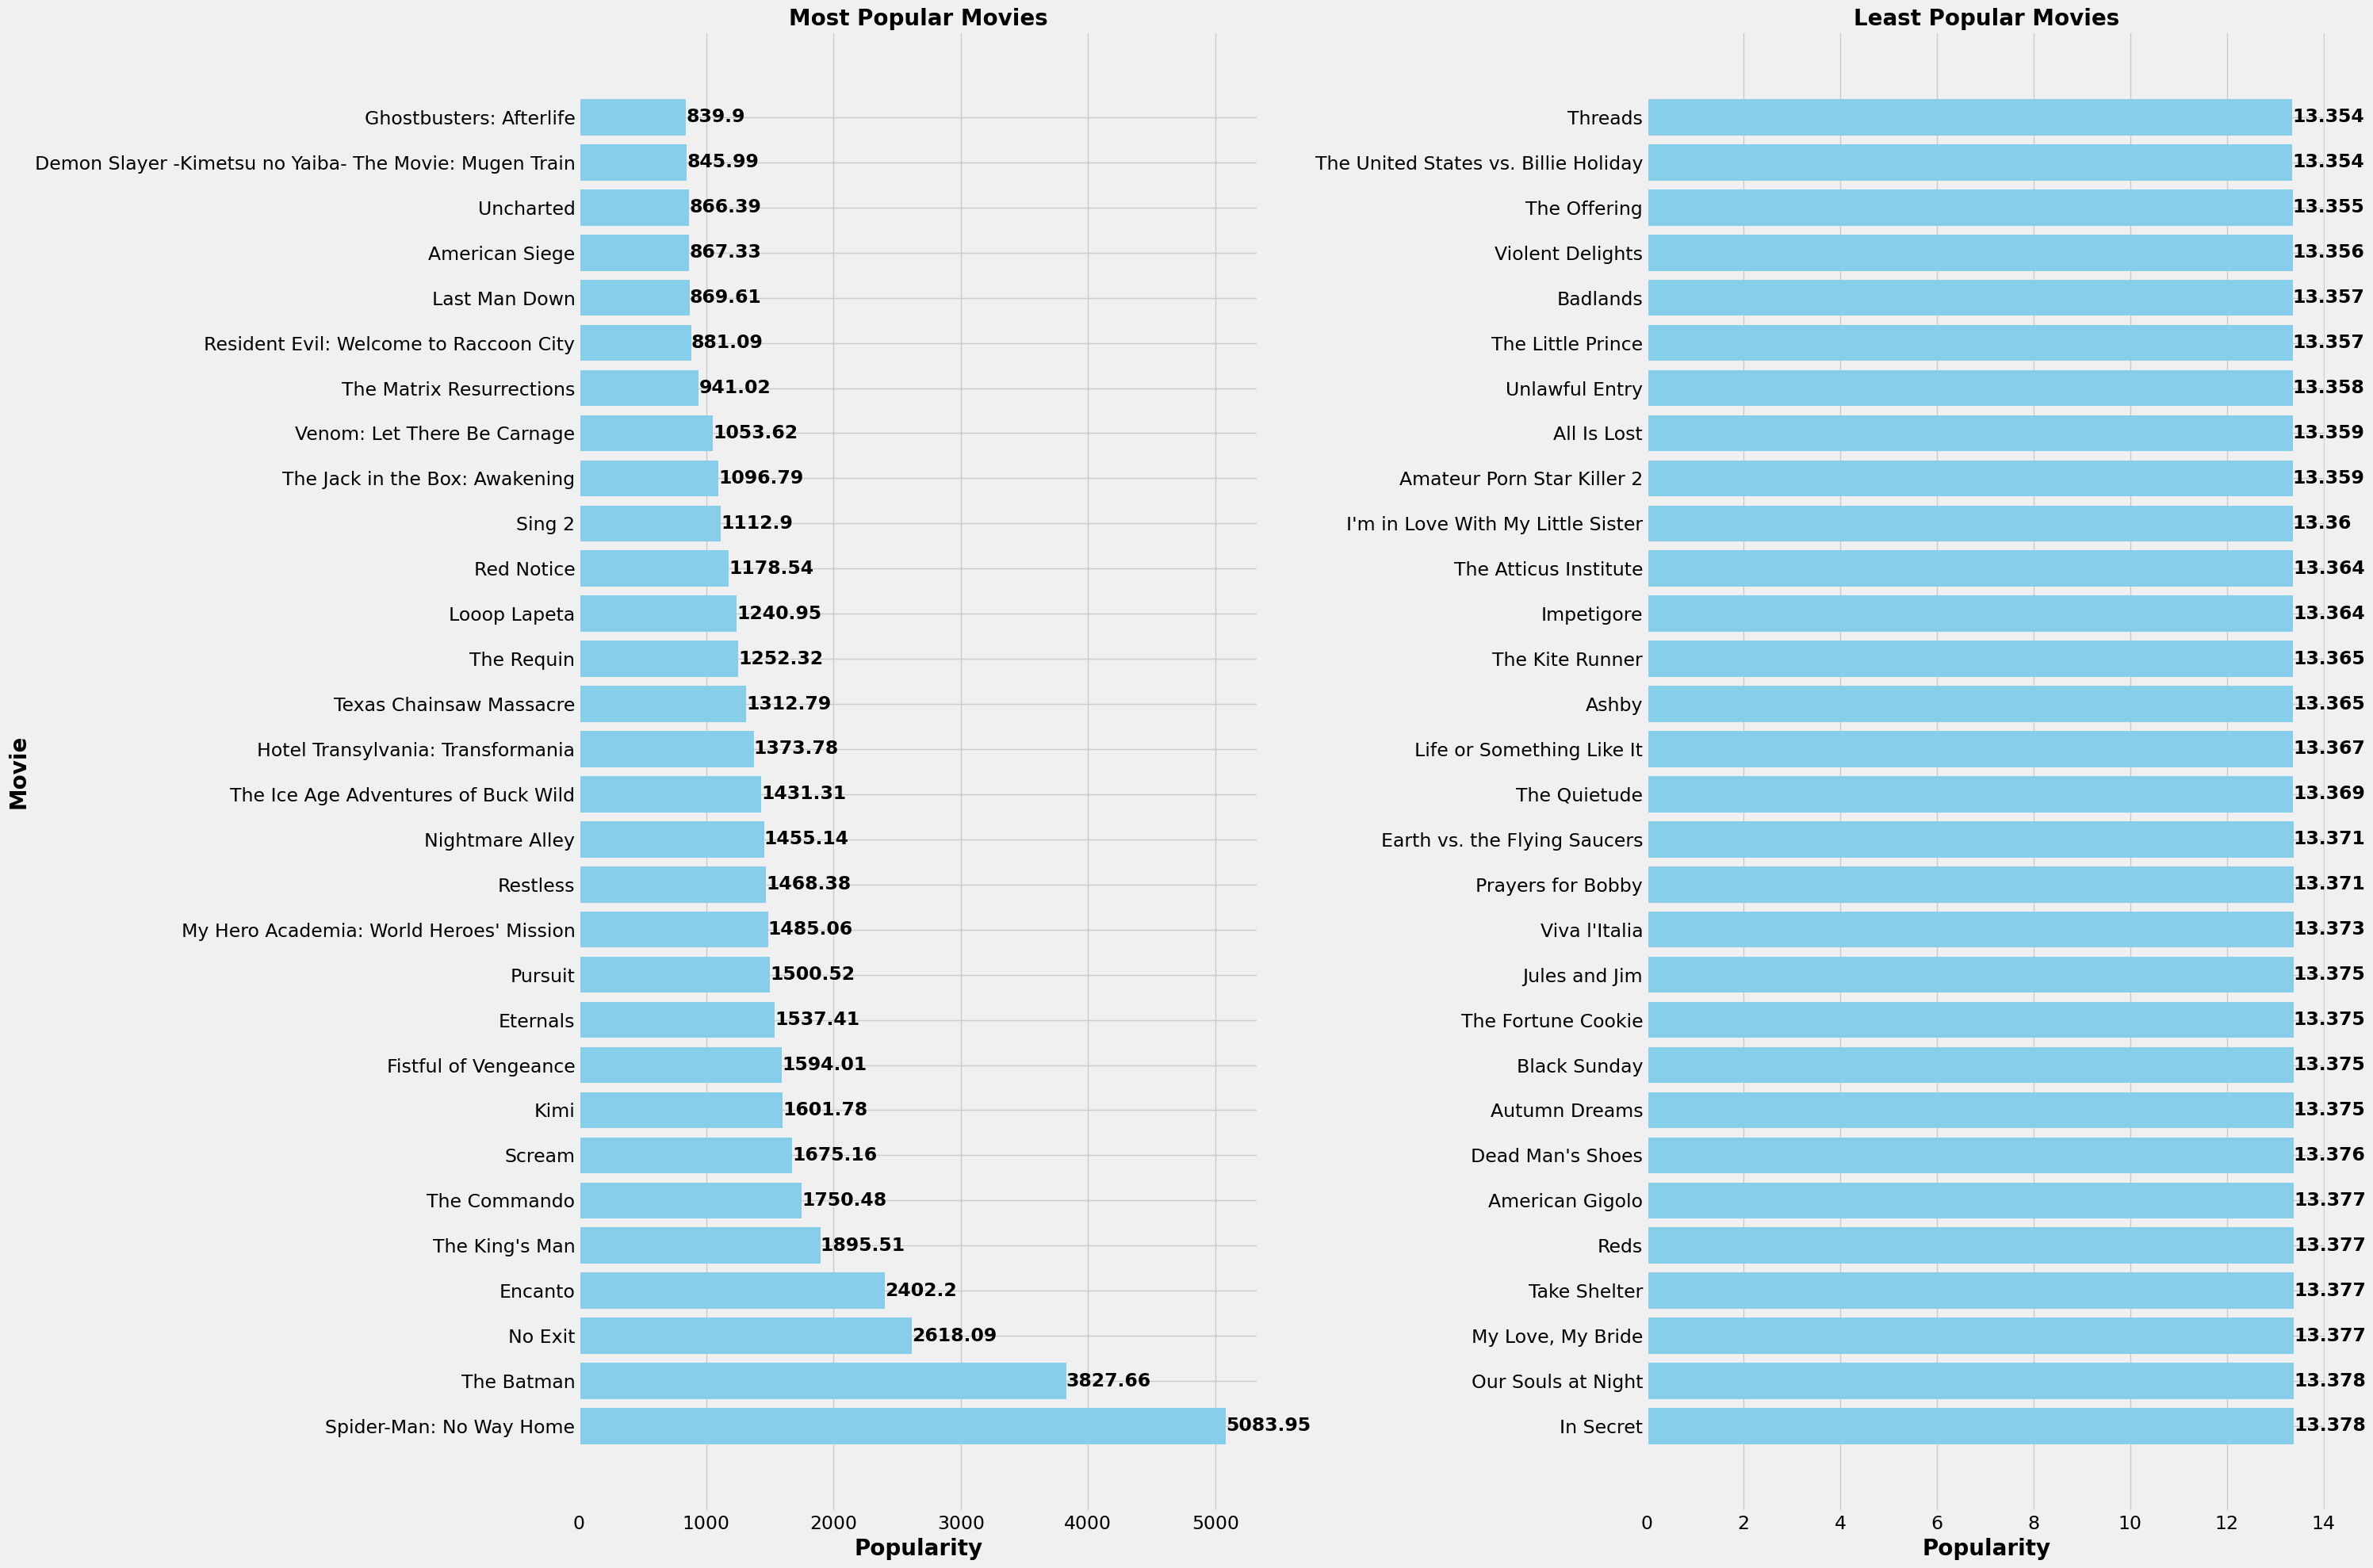

In [141]:
fig, ax = plt.subplots(1, 2, figsize=(30, 20))

ax[0].barh(most_popular.Title, most_popular.Popularity, color='skyblue')
ax[0].set_xlabel('Popularity', fontsize=20, fontweight='bold')
ax[0].set_ylabel('Movie', fontsize=20, fontweight='bold')
ax[0].set_title('Most Popular Movies', fontsize=20, fontweight='bold')

ax[1].barh(least_popular.Title, least_popular.Popularity, color='skyblue')
ax[1].set_xlabel('Popularity', fontsize=20, fontweight='bold')
ax[1].set_title('Least Popular Movies', fontsize=20, fontweight='bold')

for i, v in enumerate(most_popular.Popularity):
    ax[0].text(v, i, str(round(v, 2)), va='center', fontsize=17, fontweight='bold')
    
for i, v in enumerate(least_popular.Popularity):
    ax[1].text(v, i, str(round(v, 3)), va='center', fontsize=17, fontweight='bold')
    
for i in range(2):
    ax[i].tick_params(labelsize=17)

plt.tight_layout()
plt.show()

Now we see that:
1. The most popular movie is "Spider-Man: No Way Home" with 5084 popularity.
2. The least popular movie is "Threads" and "The United States and Billie Holiday" with 13.354 popularity.

Now we have answered the questions and took insights from the data. 

It's the end of the notebook, I hope you enjoyed it and found it helpful, and if you have any questions or feedback, feel free to ask in the comments section.

Don't forget to upvote if you liked it. 🥰